In [1]:
import os
import json
from zipfile import ZipFile
import joblib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
kaggle_dictionary = json.load(open("kaggle.json"))
kaggle_dictionary.keys()
# setup kaggle credentials as environment variables
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]
!kaggle datasets download -d akshatgupta7/crop-yield-in-indian-states-dataset 

In [3]:
# unzip the dataset file
with ZipFile("crop-yield-in-indian-states-dataset.zip", "r") as zip_ref:
  zip_ref.extractall()

In [4]:
# Load the dataset
data = pd.read_csv('crop_yield.csv')

# Display the first few rows
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [5]:
# Check for missing values
data.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [7]:
# Drop rows with missing target values or fill missing values appropriately
data.dropna(subset=['Yield'], inplace=True)

# Define features and target
features = data.drop(['Yield'], axis=1)
target = data['Yield']

# Identify categorical and numerical columns
categorical_features = ['Crop', 'Season', 'State']
numerical_features = ['Crop_Year','Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# OneHotEncoding for categorical features & Standard Scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer , categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and the model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Save the model pipeline to a file
joblib.dump(model_pipeline, 'crop_yield_model.pkl')

['crop_yield_model.pkl']

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the test set
y_pred = model_pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Absolute Error (MAE): 7.350449202577538
Mean Squared Error (MSE): 9751.31544127945
R-squared (R^2): 0.9878297175810181


## Exploratory Data Analysis (EDA)


In [11]:
data_encoded = pd.get_dummies(data, columns=['Crop', 'Season', 'State'], drop_first=True)

In [12]:
scaler = StandardScaler()
numerical_features = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

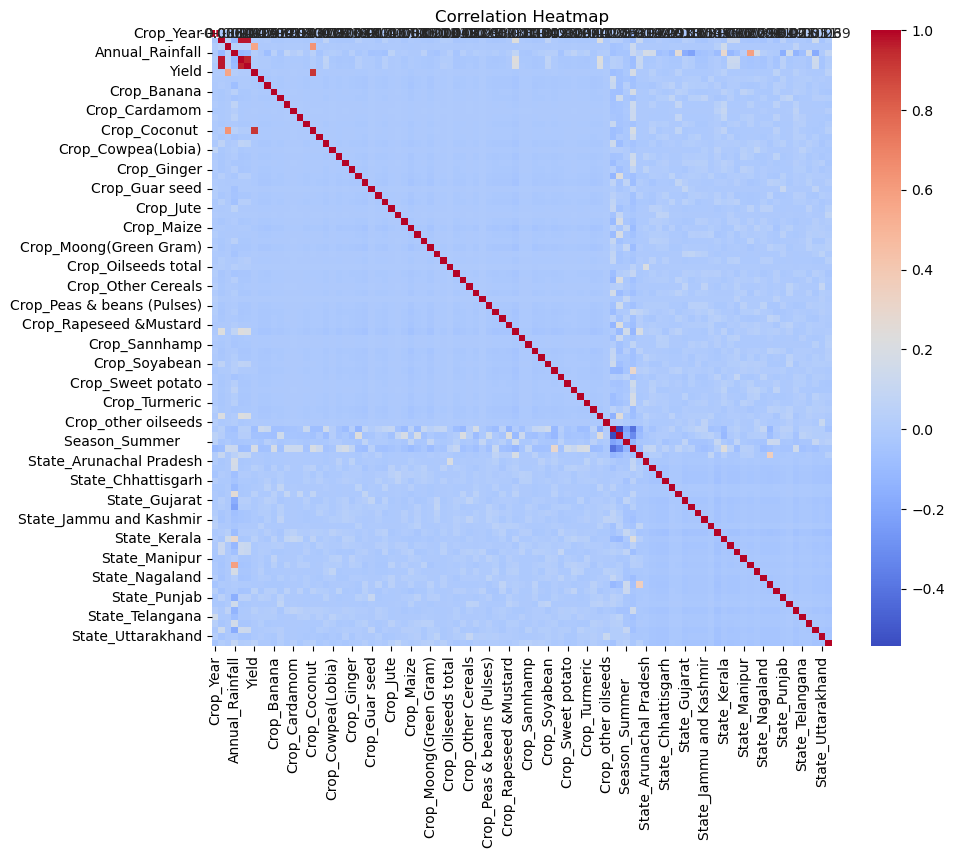

In [13]:
# numeric_data = data.select_dtypes(numerical_features)  # Select only numeric columns
correlation = data_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Mean Squared Error: 9751.31544127945
Mean Absolute Error: 7.350449202577538
R-squared: 0.9878297175810181


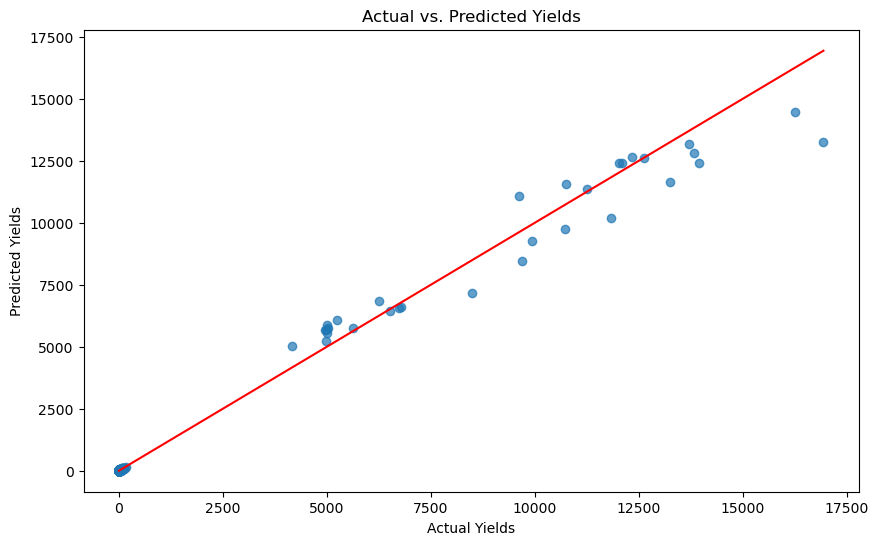

In [14]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize actual vs. predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs. Predicted Yields')
plt.xlabel('Actual Yields')
plt.ylabel('Predicted Yields')
plt.show()


### Distribution of Yield


C:\Users\ABHINAV PANDEY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


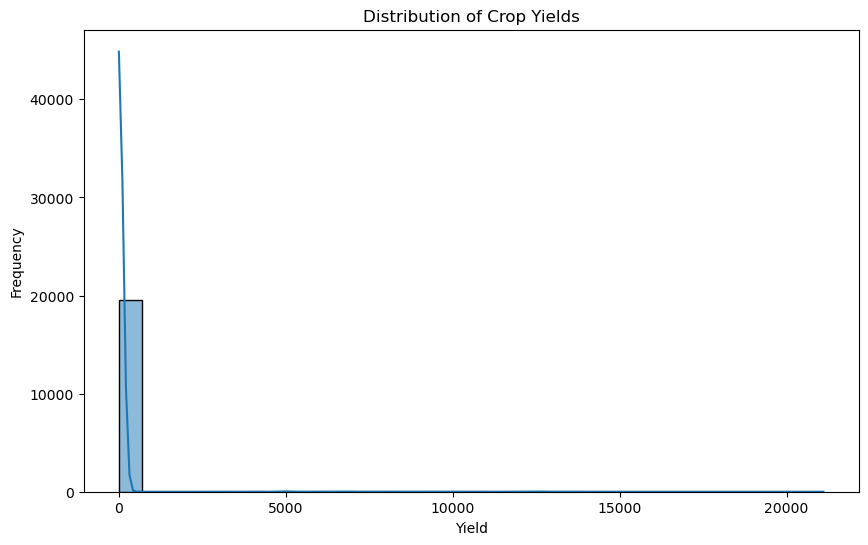

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Yield'], bins=30, kde=True)
plt.title('Distribution of Crop Yields')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()


### Distribution of Area


C:\Users\ABHINAV PANDEY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


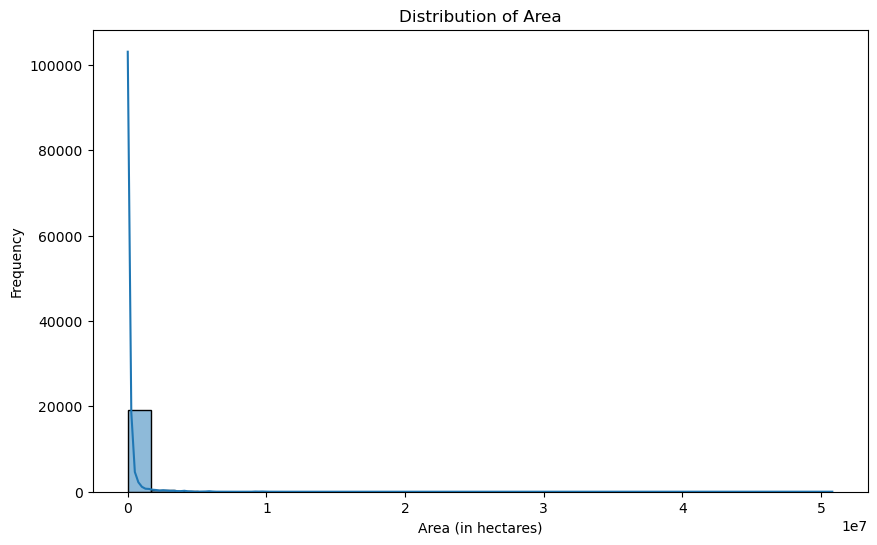

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Area'], bins=30, kde=True)
plt.title('Distribution of Area')
plt.xlabel('Area (in hectares)')
plt.ylabel('Frequency')
plt.show()


### Distribution of Production


C:\Users\ABHINAV PANDEY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


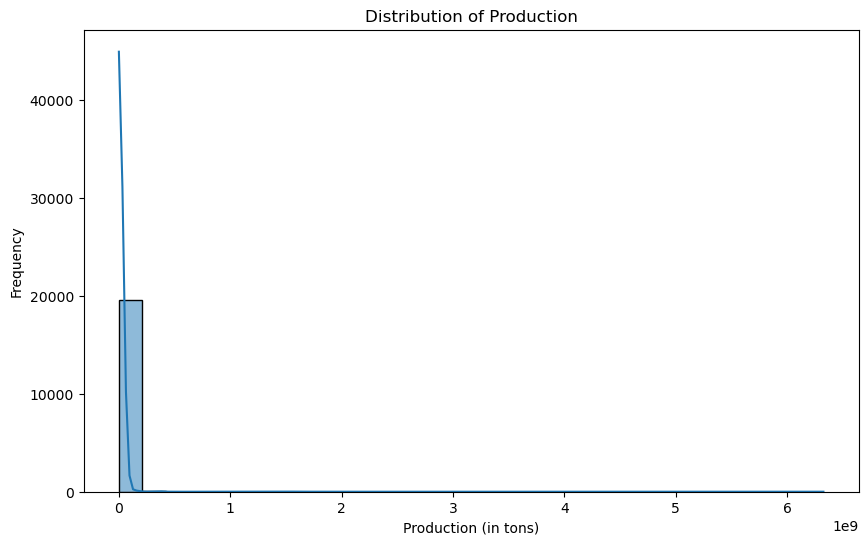

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Production'], bins=30, kde=True)
plt.title('Distribution of Production')
plt.xlabel('Production (in tons)')
plt.ylabel('Frequency')
plt.show()


## Boxplots to Show Variability


### Yield by Crop


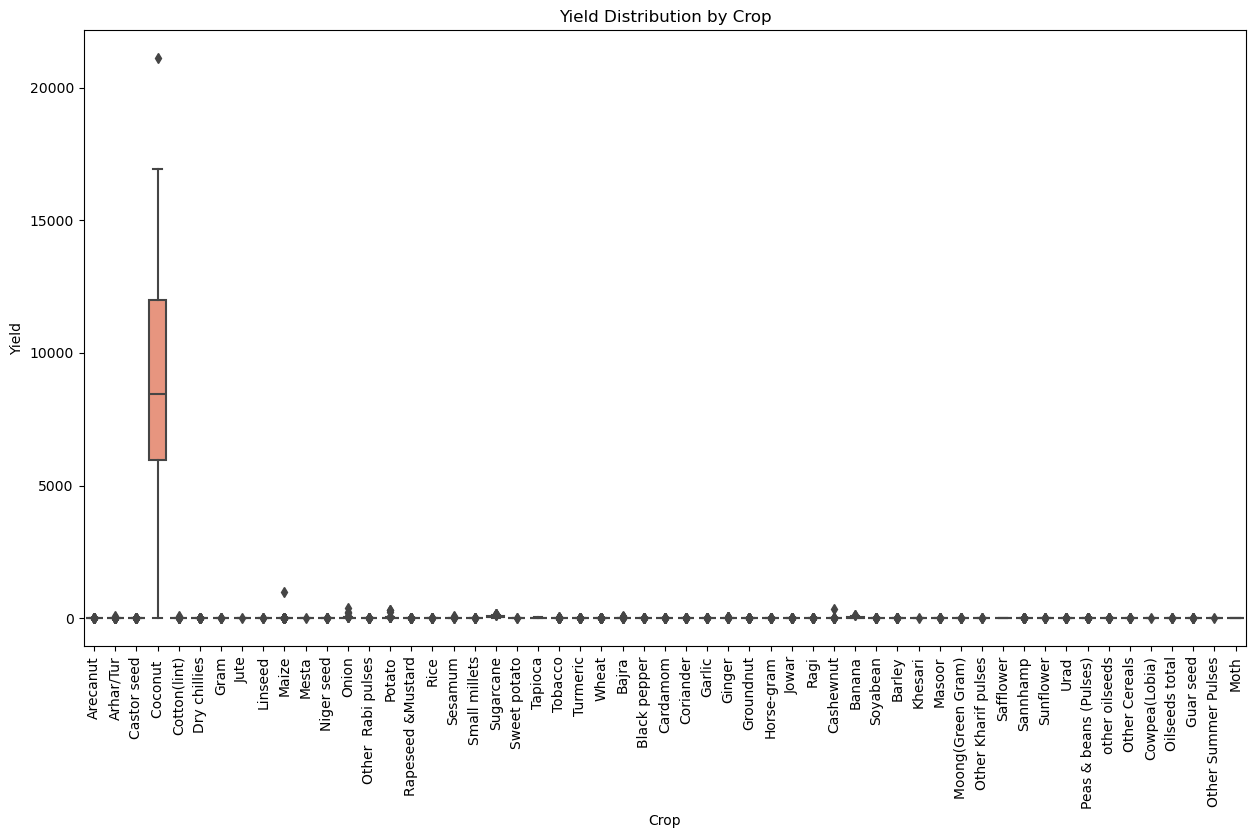

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Crop', y='Yield', data=data)
plt.title('Yield Distribution by Crop')
plt.xticks(rotation=90)
plt.show()


### Yield by State


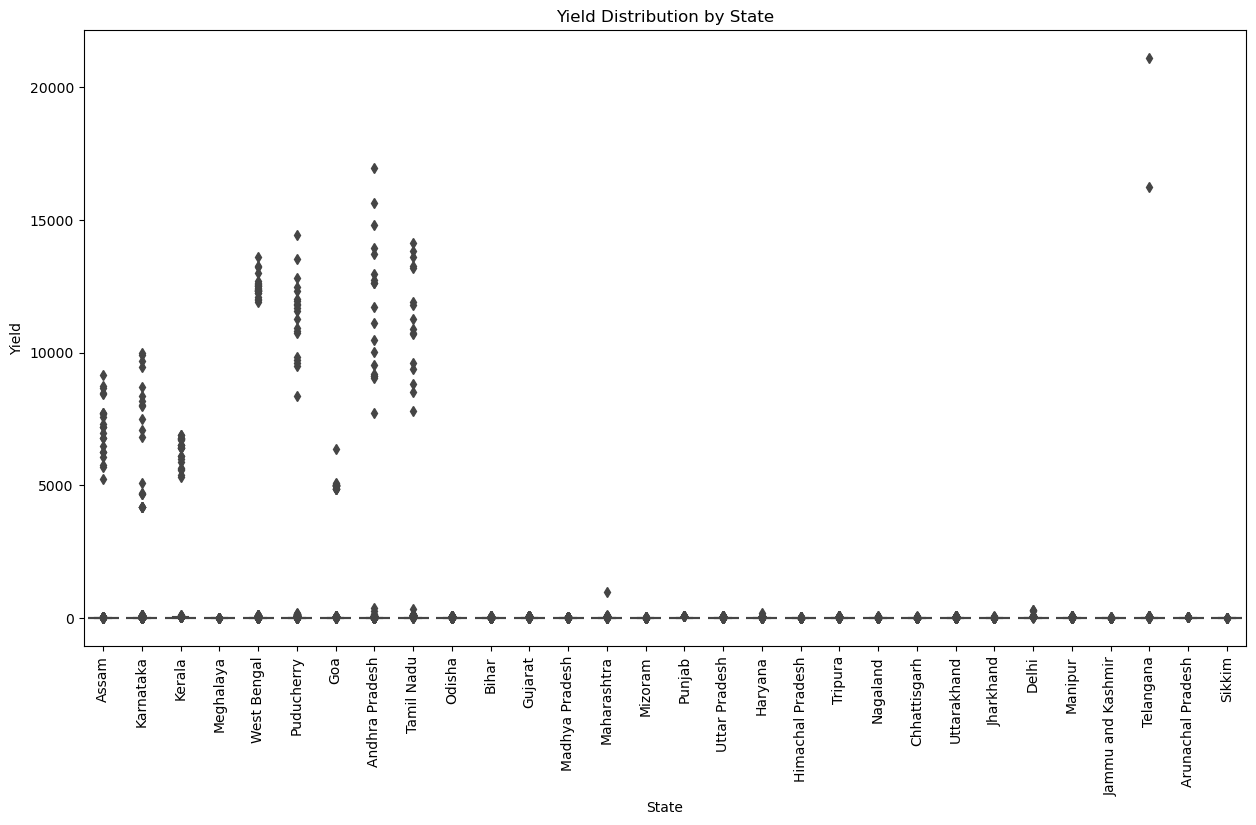

In [21]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Yield', data=data)
plt.title('Yield Distribution by State')
plt.xticks(rotation=90)
plt.show()


## 3. Correlation Heatmap


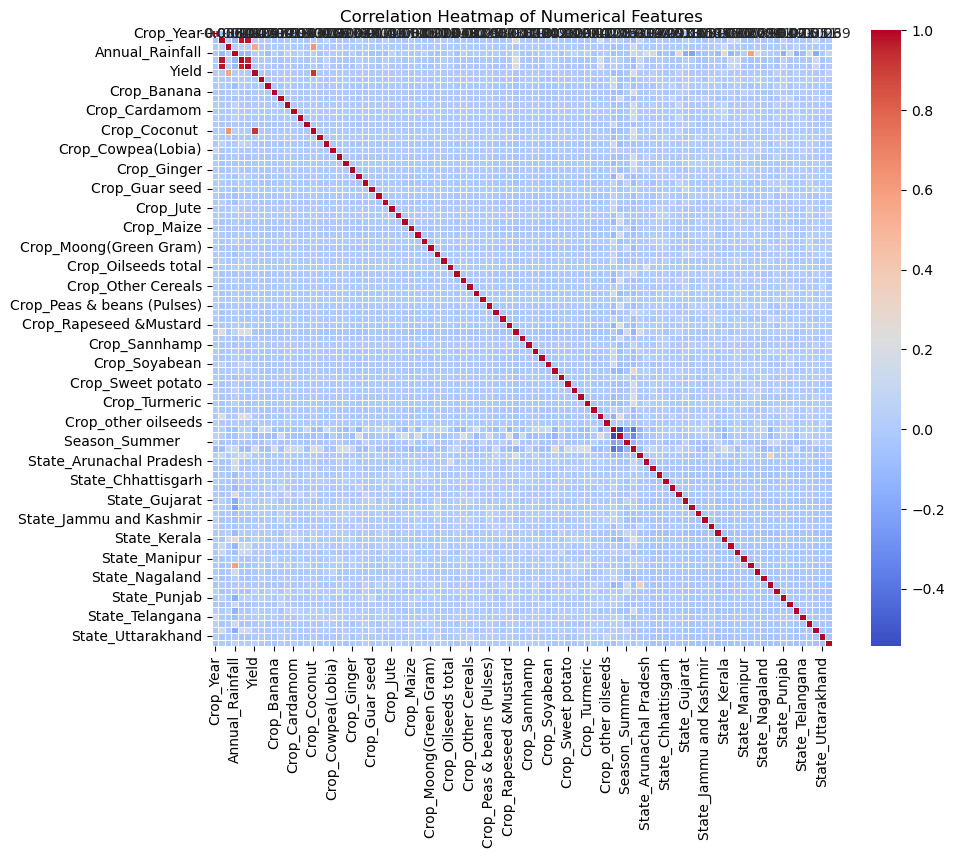

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## Scatter Plots to Identify Relationships :- Yield vs. Area



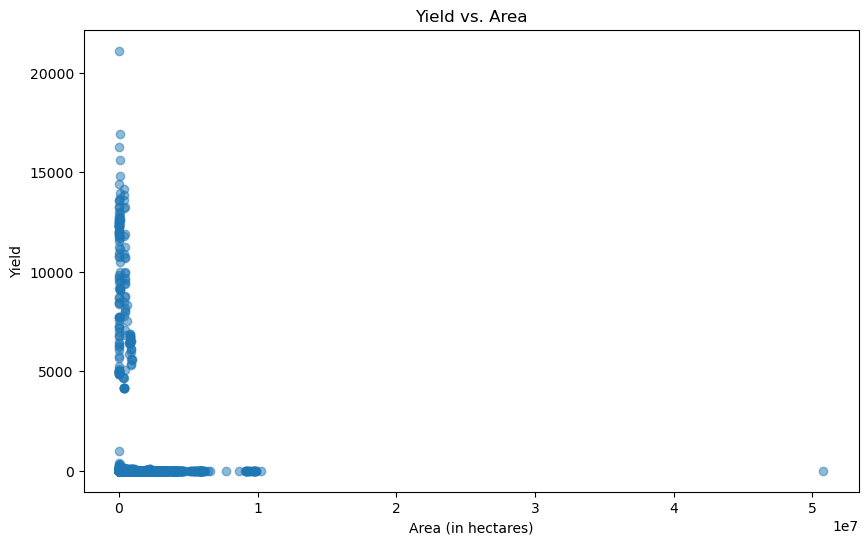

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Area'], data['Yield'], alpha=0.5)
plt.title('Yield vs. Area')
plt.xlabel('Area (in hectares)')
plt.ylabel('Yield')
plt.show()


## Line Plots for Time Series Data


Enter Crop Name: Rice


C:\Users\ABHINAV PANDEY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHINAV PANDEY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


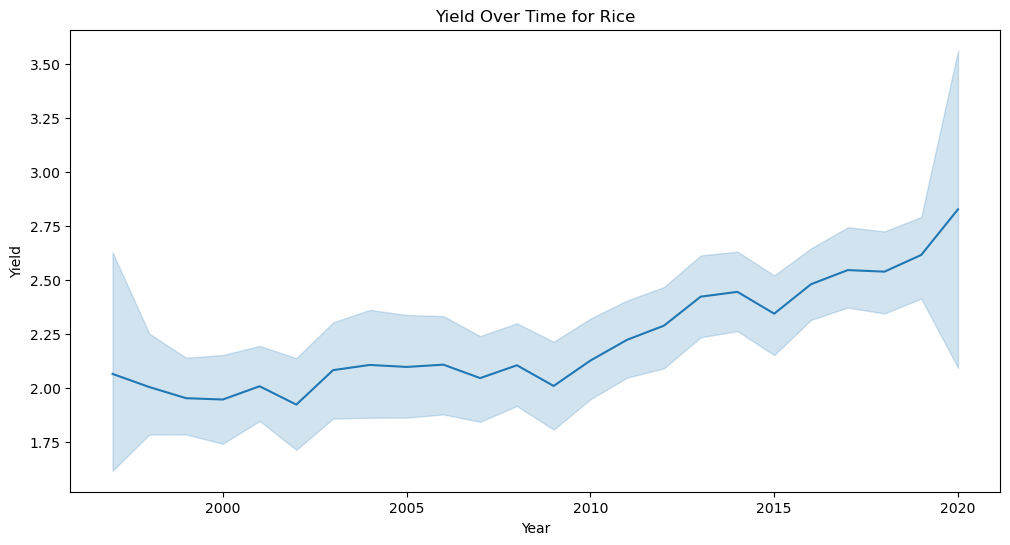

In [24]:
specific_crop =input("Enter Crop Name:") 
crop_data = data[data['Crop'] == specific_crop]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Yield', data=crop_data)
plt.title(f'Yield Over Time for {specific_crop}')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()


## Scatter Plots to Identify Relationships :- Yield vs. Production


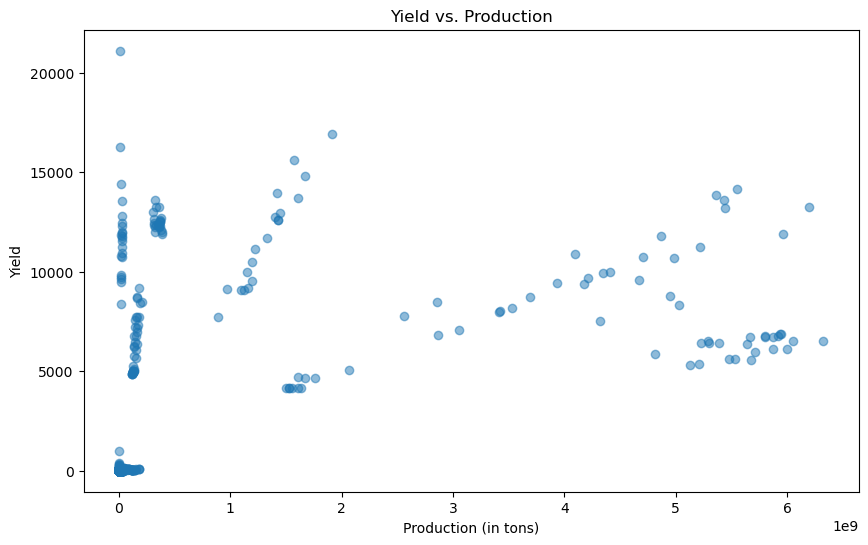

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Production'], data['Yield'], alpha=0.5)
plt.title('Yield vs. Production')
plt.xlabel('Production (in tons)')
plt.ylabel('Yield')
plt.show()


## Bar Charts for Categorical Analysis

### Average Yield by Crop


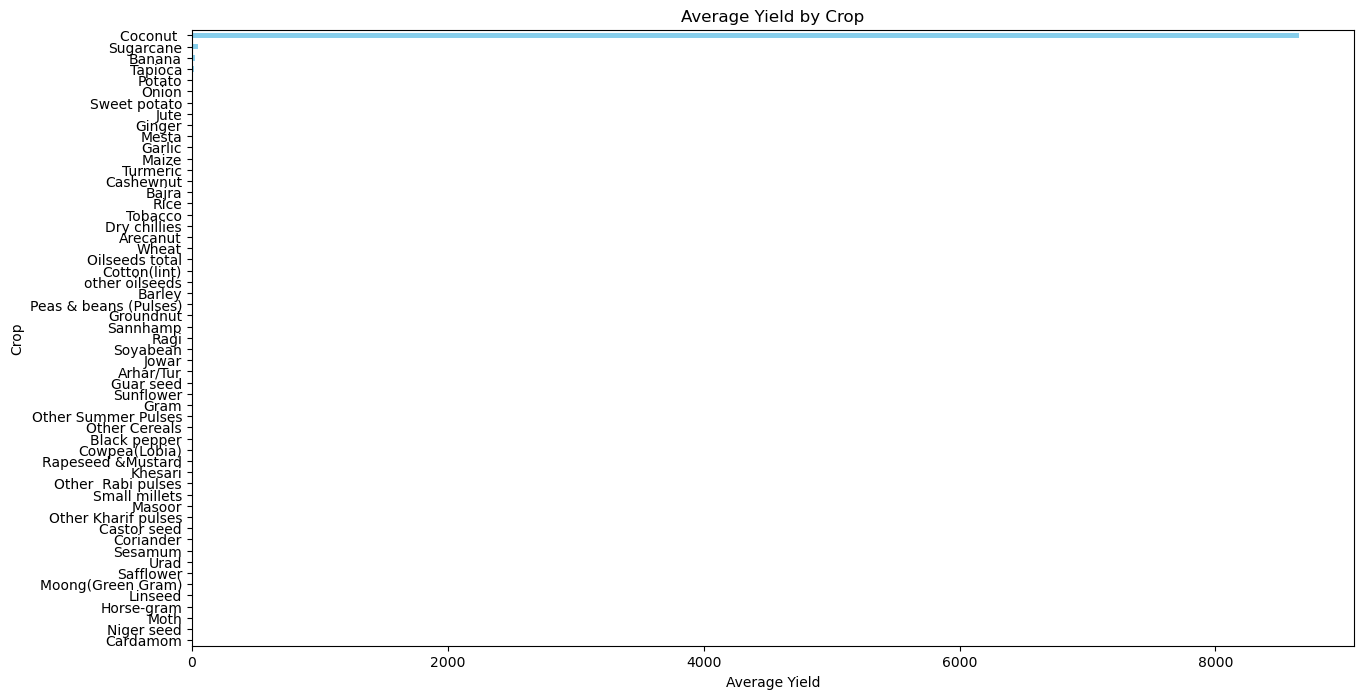

In [26]:
plt.figure(figsize=(15, 8))
avg_yield_crop = data.groupby('Crop')['Yield'].mean().sort_values()
avg_yield_crop.plot(kind='barh', color='skyblue')
plt.title('Average Yield by Crop')
plt.xlabel('Average Yield')
plt.show()


### Average Yield by State


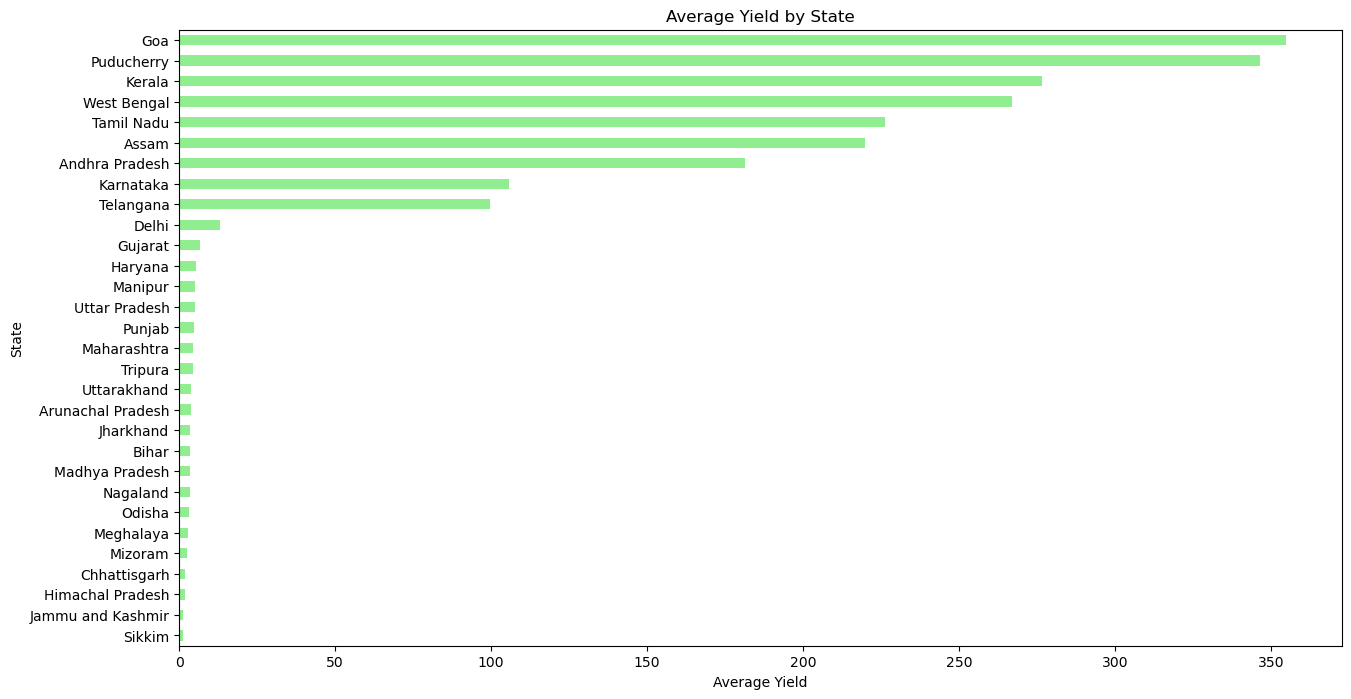

In [27]:
plt.figure(figsize=(15, 8))
avg_yield_state = data.groupby('State')['Yield'].mean().sort_values()
avg_yield_state.plot(kind='barh', color='lightgreen')
plt.title('Average Yield by State')
plt.xlabel('Average Yield')
plt.show()
